| Course | Submitted To | Submitted By | Date Submitted      | Term   |
|--------|------------|-----------|------------|--------|
| EAI6010 | RJ Munthali, Faculty Lecturer | Abhilash Dikshit | Nov 8, 2023 | Fall 2023 |


# Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a fundamental optimization algorithm used in machine learning and neural network training. It's an iterative optimization technique that aims to minimize the loss function by adjusting the model's parameters iteratively.

Here's a brief overview:

- **Gradient Descent**: In traditional Gradient Descent, the algorithm computes the gradient of the loss function with respect to all training examples in one pass and updates the model's parameters. It calculates the average gradient for the entire dataset, which can be computationally expensive for large datasets.

- **Stochastic Gradient Descent**: SGD is a variation of Gradient Descent that works by updating the model's parameters for each individual training example or a subset of examples (mini-batch) rather than the whole dataset at once. It computes the gradient and updates the model's parameters iteratively based on each example or mini-batch.

In [1]:
# Install fastbook library
!pip install fastbook

### Loads and preprocesses the MNIST dataset for digits 0 through 9.

In [2]:
# Import necessary libraries
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Load MNIST data
path = untar_data(URLs.MNIST)

In [3]:
# Load and preprocess the data for digits 0 through 9
digits = [str(i) for i in range(10)]
digit_tensors = [torch.stack([tensor(Image.open(o)) for o in (path/'training'/digit).ls()]).float()/255 for digit in digits]

### Visualizes the numeric representation of the images for each digit

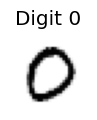

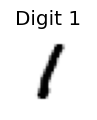

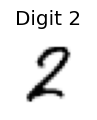

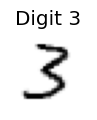

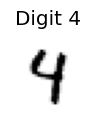

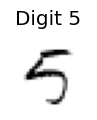

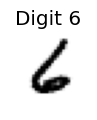

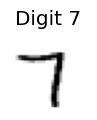

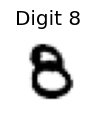

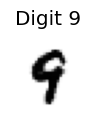

In [4]:
# Display numeric representation of images for digits 0 through 9
for i, digit_tensor in enumerate(digit_tensors):
    show_image(digit_tensor[0], title=f'Digit {i}')

In [5]:
# Calculate mean images for digits 0 through 9
mean_digits = [digit_tensor.mean(0) for digit_tensor in digit_tensors]
#print (mean_digits)

### Create a DataLoader for training and validation datasets

In [6]:
# Create a DataLoader for training
train_x = torch.cat(digit_tensors).view(-1, 28*28)
train_y = tensor([i for i in range(10) for _ in range(len(digit_tensors[0]))]).unsqueeze(1)
dset = list(zip(train_x, train_y))
dl = DataLoader(dset, batch_size=256)

In [7]:
# Load validation data for digits 0 through 9
valid_x = torch.cat([torch.stack([tensor(Image.open(o)) for o in (path/'testing'/digit).ls()]).float()/255 for digit in digits]).view(-1, 28*28)
valid_y = tensor([i for i in range(10) for _ in range(1000)]).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))
valid_dl = DataLoader(valid_dset, batch_size=256)

### Define a function to determine the digit based on mean images calculated for each digit

In [8]:
# Define a function for calculating gradients
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = F.cross_entropy(preds, yb.squeeze())
    loss.backward()

In [9]:
# Define a function for training one epoch
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [10]:
# Define a function for calculating validation accuracy
def validate_epoch(model):
    accs = [accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [11]:
# Define a function for training the model
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model, lr, params)
        print(validate_epoch(model), end=' ')

In [12]:
# Define the learning rate
lr = 0.1

### Train a linear model using Stochastic Gradient Descent (SGD) optimization for 20 epochs

In [13]:
# Create a linear model and optimizer
linear_model = nn.Linear(28*28, 10)
opt = SGD(linear_model.parameters(), lr)

In [14]:
# Train the model
train_model(linear_model, 20)

0.1211 0.1301 0.1647 0.1759 0.1839 0.1893 0.1936 0.1989 0.2013 0.2039 0.2066 0.2083 0.2101 0.2116 0.2128 0.2142 0.2146 0.2156 0.2165 0.2175 

### Display a prediction for a sample image from the validation dataset

In [15]:
# 'linear_model' is the model trained and available
model = linear_model.eval()  # Set the model to evaluation mode

# Get the first image from the validation set
sample_image = valid_x[0].unsqueeze(0)  # Adjust for batch size

# Make a prediction using the model
with torch.no_grad():
    output = model(sample_image)
    prediction = torch.argmax(output, dim=1).item()

# Display the predicted digit
print(f'Predicted Digit: {prediction}')


Predicted Digit: 0


In [16]:
# Function to predict labels for all images in the validation dataset using the given model
def predict_all_images(model):
    all_preds = []
    with torch.no_grad():
        for images, _ in valid_dl:
            preds = model(images)
            all_preds.extend(torch.argmax(preds, dim=1).tolist())
    return all_preds


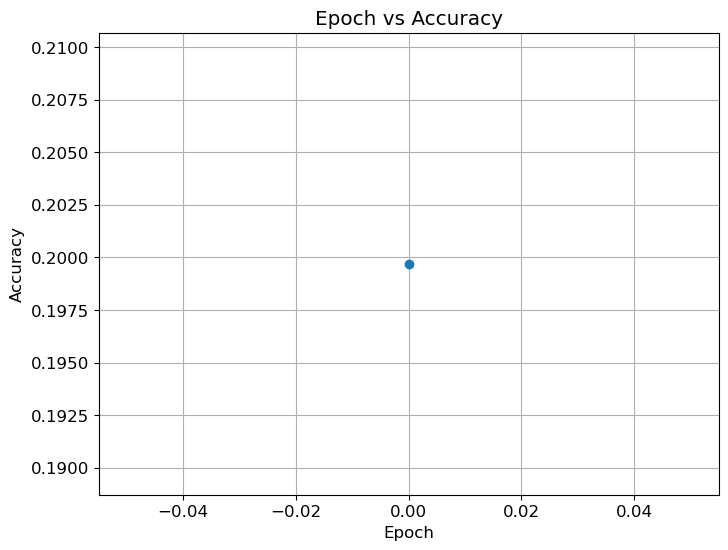

In [ ]:
import matplotlib.pyplot as plt
import math

# Define a function to calculate accuracy
def compute_accuracy(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in valid_dl:
            outputs = model(xb)
            _, predicted = torch.max(outputs, 1)
            total += yb.size(0)
            correct += (predicted == yb.squeeze()).sum().item()
    return correct / total

# Train the model and show predictions for each epoch
epoch_accuracies = []
for epoch in range(20):
    train_epoch(linear_model, lr, None)
    accuracy = compute_accuracy(linear_model)
    epoch_accuracies.append(accuracy)
    
    all_predictions = predict_all_images(linear_model)
    
    # Plotting epoch vs accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(epoch + 1), epoch_accuracies, marker='o')
    plt.title('Epoch vs Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    # Show predictions for all images
    num_images = len(all_predictions)
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)
    
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(valid_x[i].view(28, 28), cmap='gray')
        plt.title(f'Pred: {all_predictions[i]}', fontsize=8)  # Reduced the font size of titles
        plt.axis('off')
    plt.tight_layout()
    plt.show()


We are creating a custom **compute_accuracy** function that checks the correctness of predictions against the actual labels. 

It then plots the accuracy for each epoch and displays predictions for all images in the validation set.

- **Key Characteristics**:
    - **Stochasticity**: SGD introduces randomness in the parameter updates by randomly selecting individual examples or mini-batches.
    - **Faster Iterations**: Since it updates the parameters more frequently, it can converge faster as each update considers only a small subset of the data.
    - **Noisy Updates**: The stochastic nature can lead to noisy updates, causing the loss function to fluctuate around the minimum.
    - **Learning Rate**: It requires a learning rate parameter, which determines the step size for each parameter update.

- **Benefits**:
    - Especially useful for large datasets as it processes data in smaller chunks.
    - Can escape local minima as it introduces stochasticity in the updates.

- **Challenges**:
    - Noisy updates can cause erratic behavior in convergence.
    - May require careful tuning of the learning rate for stability.

In practice, variations of SGD, such as Mini-batch Gradient Descent (which processes batches of data rather than individual samples), are commonly used due to a balanced approach—less noisy than SGD and less computationally intensive than regular Gradient Descent.